notebook for gen Particles.
Open using uproot.
Matching with gen using dR

In [1]:
import uproot
import awkward as ak
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import scipy as s
import pickle
from scipy.integrate import quad
import scipy.integrate as integrate

In [2]:
# read the ttree
tree = uproot.open("/depot/cms/private/users/gpaspala/output_1.root")["Events"]
# read the pf candidates and gen particle information into akward arrays
pfcands = tree.arrays(tree.keys('PF_*') + ['nPF'], entry_start=0, entry_stop=2000)
genparts = tree.arrays(tree.keys('packedGenPart_*') + ['npackedGenPart'], entry_start=0, entry_stop=2000)


In [3]:
print(tree.keys(filter_name="packedGenPart_*"))

['packedGenPart_eta', 'packedGenPart_mass', 'packedGenPart_phi', 'packedGenPart_pt', 'packedGenPart_charge', 'packedGenPart_pdgId', 'packedGenPart_status']


In [4]:
print(tree.keys(filter_name="PF_*"))

['PF_d0', 'PF_d0Error', 'PF_dz', 'PF_dzError', 'PF_eta', 'PF_hcalFraction', 'PF_mass', 'PF_phi', 'PF_pt', 'PF_puppiWeight', 'PF_puppiWeightNoLep', 'PF_rawCaloFraction', 'PF_trkChi2', 'PF_vertexChi2', 'PF_vertexNdof', 'PF_vertexNormalizedChi2', 'PF_charge', 'PF_fromPV', 'PF_lostInnerHits', 'PF_pdgId', 'PF_pvAssocQuality', 'PF_status', 'PF_trkQuality', 'PF_hasTrackDetails', 'PF_isIsolatedChargedHadron']


In [5]:
tree.show(filter_name="packedGenPart_*")

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
packedGenPart_eta    | float[]                  | AsJagged(AsDtype('>f4'))
packedGenPart_mass   | float[]                  | AsJagged(AsDtype('>f4'))
packedGenPart_phi    | float[]                  | AsJagged(AsDtype('>f4'))
packedGenPart_pt     | float[]                  | AsJagged(AsDtype('>f4'))
packedGenPart_charge | int32_t[]                | AsJagged(AsDtype('>i4'))
packedGenPart_pdgId  | int32_t[]                | AsJagged(AsDtype('>i4'))
packedGenPart_status | int32_t[]                | AsJagged(AsDtype('>i4'))


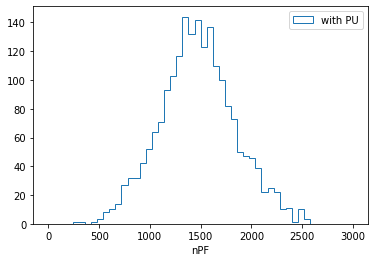

In [6]:
#check puppy distribution
# plot the number of PF candidates per event
plt.figure()
plt.hist( ak.to_numpy(pfcands['nPF']), bins=50, range=(0,3000), histtype='step', label= "with PU")
plt.xlabel("nPF")
plt.legend()

plt.show()

[[0.748, 0.712, 0.31, 0.486, 0.501, 0.2, ... 0.172, 0.00833, 0.11, 0.265, 0.146]]


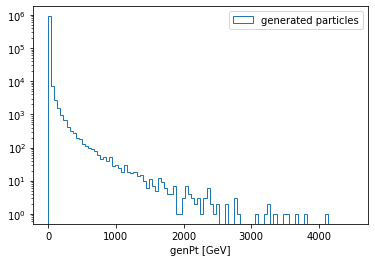

In [7]:
#Plot the Pt of generated particles
genPt_1= genparts['packedGenPart_pt']
print(genPt_1)
plt.figure()
plt.yscale("log")
plt.hist (ak.to_numpy(ak.flatten(genparts['packedGenPart_pt'])), bins=100, range=(0,4500), label='generated particles', histtype='step')
plt.xlabel("genPt [GeV]")
plt.legend()
plt.show()
#get the number of entries
#print(genparts["packedGenPart_pt"])
bin_width=45
total=ak.to_numpy(ak.flatten(genparts['packedGenPart_pt'])).sum()
#print(total)

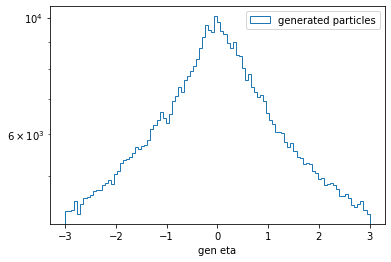

In [8]:
#Plot the eta of generated particles
plt.figure()
plt.yscale("log")
plt.hist (ak.to_numpy(ak.flatten(genparts['packedGenPart_eta'])), bins=100, range=(-3,3), label='generated particles', histtype='step')
plt.xlabel("gen eta")
plt.legend()
plt.show()

In [9]:
isGenChg = genparts['packedGenPart_charge']!=0
print (abs(genparts['packedGenPart_charge']))

[[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


[[0.748, 0.712, 0.486, 0.501, 0.2, 0.243, ... 0.239, 0.279, 0.151, 0.382, 0.409]]


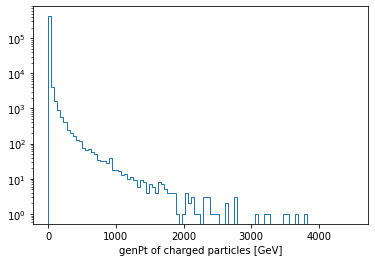

In [10]:
#plot charged generated particles pt
genPt = genparts['packedGenPart_pt'][isGenChg]
print(genPt)
plt.figure()
plt.yscale("log")
#plt.hist (genparts['packedGenPart_pt'][isGenChg][1], bins=50, range=(0,80), histtype='step')
plt.hist (ak.to_numpy(ak.flatten(genparts['packedGenPart_pt'][isGenChg])), bins=100, range=(0,4500), histtype='step')
plt.xlabel("genPt of charged particles [GeV]")
plt.show()

[[-3.03, -4.32, -4.64, -2.47, -1.25, -3.94, ... -0.243, -0.133, 2.98, 1.69, 6.02]]


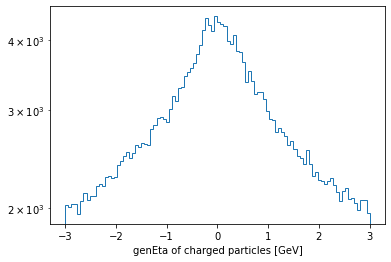

In [11]:
#plot charged generated particles eta
geneta = genparts['packedGenPart_eta'][isGenChg]
print(geneta)
plt.figure()
plt.yscale("log")
#plt.hist (genparts['packedGenPart_pt'][isGenChg][1], bins=50, range=(0,80), histtype='step')
plt.hist (ak.to_numpy(ak.flatten(genparts['packedGenPart_eta'][isGenChg])), bins=100, range=(-3,3), histtype='step')
plt.xlabel("genEta of charged particles [GeV]")
plt.show()

In [12]:
total=ak.to_numpy(ak.flatten(genparts['packedGenPart_pt'])).sum()
shape = ak.to_numpy(ak.flatten(genparts['packedGenPart_pt'])).shape[0]
print (shape)


930809


[[-1.68, -2.79, -0.598, -1.73, -1.26, -0.119, ... 2.92, 0.761, 0.357, -0.253, 1.84]]


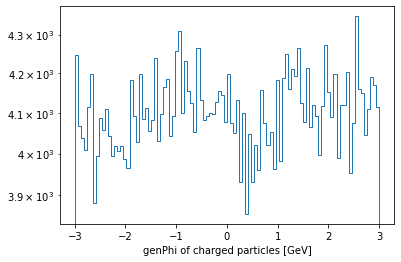

In [13]:
#plot charged generated particles phi
genphi = genparts['packedGenPart_phi'][isGenChg]
print (genphi)
plt.figure()
plt.yscale("log")
#plt.hist (genparts['packedGenPart_pt'][isGenChg][1], bins=50, range=(0,80), histtype='step')
plt.hist (ak.to_numpy(ak.flatten(genparts['packedGenPart_phi'][isGenChg])), bins=100, range=(-3,3), histtype='step')
plt.xlabel("genPhi of charged particles [GeV]")
plt.show()

In [14]:
#save them in pickel file